In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency

palette = sns.color_palette("Set2", 8)

sns.set_palette(palette)

In [2]:
data = pd.read_table("../SGB985_metadata.tsv")

In [3]:
summary_statistics = data.describe()
summary_statistics

,bmi,age
count,28.000000,30.000000
mean,23.138217,65.033333
std,3.099085,10.819788
min,15.916955,44.000000
25%,20.388889,59.000000
50%,23.356500,62.500000
75%,25.840130,74.750000
max,27.548209,87.000000


In [9]:
sex_distribution = data['sex'].value_counts()
smoking_distribution = data['smoking_state'].value_counts()
study_group_distribution = data['study_group'].value_counts()

sex_distribution, smoking_distribution, study_group_distribution

(sex
 female    16
 male      14
 Name: count, dtype: int64,
 smoking_state
 non-smoker    17
 ex-smoker      7
 smoker         6
 Name: count, dtype: int64,
 study_group
 mucositis          13
 periimplantitis    12
 healthy             5
 Name: count, dtype: int64)

In [10]:
# Exploring the relationship between BMI and age with the study group.
bmi_study_group = data.groupby('study_group')['bmi'].mean()
age_study_group = data.groupby('study_group')['age'].mean()
bmi_study_group, age_study_group

(study_group
 healthy            23.987630
 mucositis          23.160377
 periimplantitis    22.684701
 Name: bmi, dtype: float64,
 study_group
 healthy            57.800000
 mucositis          64.000000
 periimplantitis    69.166667
 Name: age, dtype: float64)

In [11]:
# Exploring the relationship between smoking state and study group.
smoking_study_group = pd.crosstab(data['study_group'], data['smoking_state'])
smoking_study_group

smoking_state,ex-smoker,non-smoker,smoker
study_group,,,
healthy,2,2,1
mucositis,2,7,4
periimplantitis,3,8,1


In [12]:
# Checking for any subtle patterns such as the relationship between BMI, age, and smoking state.
bmi_smoking_age = data.groupby('smoking_state').agg({'bmi':'mean', 'age':'mean'})
bmi_smoking_age

,bmi,age
smoking_state,,
ex-smoker,23.453274,64.571429
non-smoker,22.762615,66.411765
smoker,23.899059,61.666667


- The 'healthy' group has a higher mean BMI but a lower average age compared to the 'mucositis' and 'periimplantitis' groups.
- Periimplantitis is more prevalent in older age groups, while the healthy individuals are on average younger.
- There is no clear pattern of smoking status dominating any particular study group, but non-smokers are the largest group across all study conditions.

### Statistical Significance 

In [16]:
bmi_periimplantitis = data[data['study_group'] == 'periimplantitis']['bmi'].dropna()
bmi_mucositis = data[data['study_group'] == 'mucositis']['bmi'].dropna()
bmi_healthy = data[data['study_group'] == 'healthy']['bmi'].dropna()

# Perform ANOVA test for BMI
anova_results_bmi = f_oneway(bmi_periimplantitis, bmi_mucositis, bmi_healthy)

# Exclude missing values for age and perform ANOVA
age_periimplantitis = data[data['study_group'] == 'periimplantitis']['age'].dropna()
age_mucositis = data[data['study_group'] == 'mucositis']['age'].dropna()
age_healthy = data[data['study_group'] == 'healthy']['age'].dropna()

# Perform ANOVA test for age
anova_results_age = f_oneway(age_periimplantitis, age_mucositis, age_healthy)

# For the Chi-squared test, ensure the contingency table does not include any rows or columns with a sum of 0, which might happen after removing NaNs
# Contingency table of smoking state and study group
contingency_table = pd.crosstab(data['study_group'], data['smoking_state']).replace(0, np.nan).dropna(axis='index', how='all').dropna(axis='columns', how='all').fillna(0)

# Perform Chi-squared test
chi2_results = chi2_contingency(contingency_table)

(anova_results_bmi, anova_results_age, chi2_results)

(F_onewayResult(statistic=0.27945708774071076, pvalue=0.758525372952418),
 F_onewayResult(statistic=2.22570739071757, pvalue=0.1274290083603407),
 Chi2ContingencyResult(statistic=3.0071644042232273, pvalue=0.5566271710383818, dof=4, expected_freq=array([[1.16666667, 2.83333333, 1.        ],
        [3.03333333, 7.36666667, 2.6       ],
        [2.8       , 6.8       , 2.4       ]])))

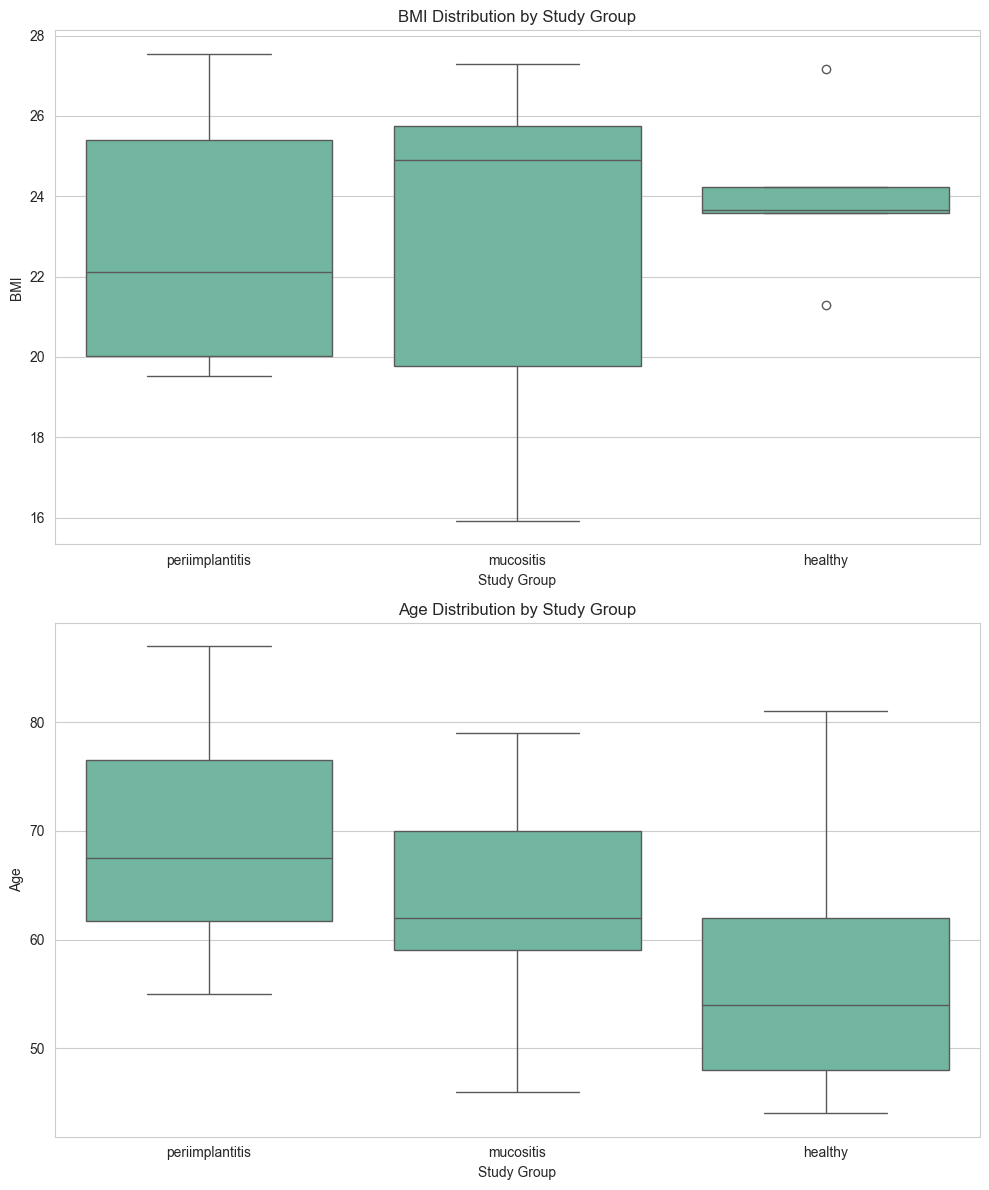

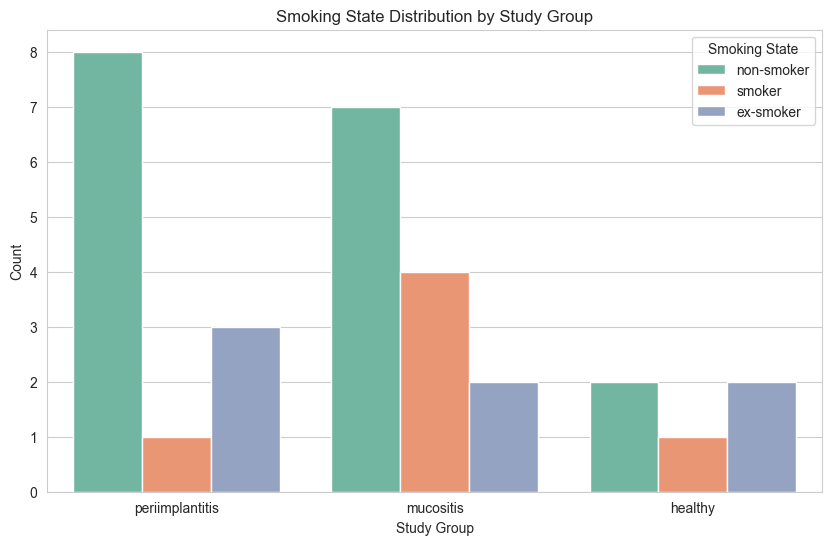

In [17]:
sns.set_style("whitegrid")

# Create a figure for the plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Boxplot for BMI by study group
sns.boxplot(x='study_group', y='bmi', data=data, ax=axes[0])
axes[0].set_title('BMI Distribution by Study Group')
axes[0].set_xlabel('Study Group')
axes[0].set_ylabel('BMI')

# Boxplot for Age by study group
sns.boxplot(x='study_group', y='age', data=data, ax=axes[1])
axes[1].set_title('Age Distribution by Study Group')
axes[1].set_xlabel('Study Group')
axes[1].set_ylabel('Age')

plt.tight_layout()

# Show plots
plt.show()

# For smoking state, since it's categorical, a count plot will be more informative.
plt.figure(figsize=(10, 6))
sns.countplot(x='study_group', hue='smoking_state', data=data)
plt.title('Smoking State Distribution by Study Group')
plt.xlabel('Study Group')
plt.ylabel('Count')
plt.legend(title='Smoking State')

plt.show()

There is no significant correlation in our dataset but some studies show that

low BMI is correlated with mucositis 
obesity is with...

(Here mention literature, our findings and potential reasons)

TODO: Add labels and consistency to charts / maybe also add p-values to 

maybe do it in R

http://www.sthda.com/english/articles/24-ggpubr-publication-ready-plots/76-add-p-values-and-significance-levels-to-ggplots/